In [27]:
from fairworkflows import FairStep, FairWorkflow, fairstep

# Load a step from a nanopublication.
This lives in a FairStep object that can give information about the step (i.e. description, is_manual_task, etc) as well as validating it with respect to the plex ontology.

In [28]:
step = FairStep(uri='http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step', from_nanopub=True)

In [29]:
print(step)

Step URI = http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step
@prefix ns1: <http://purl.org/dc/terms/> .

_:Ne0c2d802f0a741ce9d01239da7ef60da {
    <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ManualTask>,
            <http://purl.org/net/p-plan#Step> ;
        ns1:description "Preheat an oven to 350 degrees F (175 degrees C)." .
}




In [30]:
step.validate()

True

In [31]:
step.is_pplan_step()

True

In [32]:
step.description()

rdflib.term.Literal('Preheat an oven to 350 degrees F (175 degrees C).')

In [33]:
step.is_manual_task()

True

In [34]:
step.is_script_task()

False

# Create a FairWorkflow
Then add a few steps to it.

In [35]:
# Create a workflow
workflow = FairWorkflow(description='This is a test workflow.')

In [36]:
# Load some steps from nanopublications
preheat_oven = FairStep(uri='http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step', from_nanopub=True)
melt_butter = FairStep(uri='http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step', from_nanopub=True)
arrange_chicken = FairStep(uri='http://purl.org/np/RA5D8NzM2OXPZAWNlADQ8hZdVu1k0HnmVmgl20apjhU8M#step', from_nanopub=True)

In [37]:
# Specify ordering of steps
workflow.add(melt_butter, follows=preheat_oven)
workflow.add(arrange_chicken, follows=melt_butter)

In [38]:
# Does it validate? No.
workflow.validate()

Plan RDF does not specify a first step (pwo:hasFirstStep)



False

In [39]:
# Specify the first step in the plan
workflow.set_first_step(preheat_oven)

{'http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step': <fairworkflows.fairstep.FairStep object at 0x11efbb190>, 'http://purl.org/np/RA5D8NzM2OXPZAWNlADQ8hZdVu1k0HnmVmgl20apjhU8M#step': <fairworkflows.fairstep.FairStep object at 0x11ef6cfd0>, 'http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step': <fairworkflows.fairstep.FairStep object at 0x11f048280>}


In [40]:
# Print workflow rdf
print(workflow)

Workflow URI = http://purl.org/nanopub/temp/mynanopub#plan
@prefix ns1: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#> .
@prefix ns2: <http://purl.org/spar/pwo#> .
@prefix ns3: <http://purl.org/dc/terms/> .

_:Ne9958bd310e74e429b625a4a54e30446 {
    <http://purl.org/nanopub/temp/mynanopub#plan> a <http://purl.org/net/p-plan#Plan> ;
        ns3:description "This is a test workflow." ;
        ns2:hasFirstStep <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> .

    <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> ns1:precedes <http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step> .

    <http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step> ns1:precedes <http://purl.org/np/RA5D8NzM2OXPZAWNlADQ8hZdVu1k0HnmVmgl20apjhU8M#step> .
}




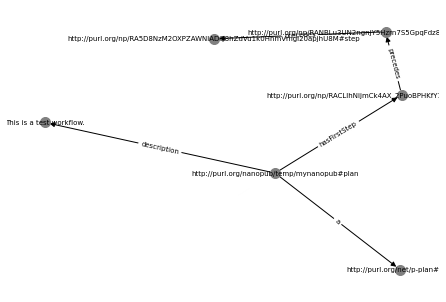

In [41]:
# What does the graph look like?
workflow.draw()

# What if we want to add computational steps?
You can convert a python function to a FairStep and add it to the plex workflow.

In [42]:
# Define your computational step as a function
def a_computational_step(x, y):
    """A test function that adds two numbers"""
    return x + y

In [43]:
# Make it a FairStep and add it to the workflow
new_step = FairStep(func=a_computational_step)
workflow.add(new_step)

# Alternatively, use the @fairstep decorator
Use the decorator on any function that defines a computational step you wish to carry out. Each time it is called, a FairStep describing that step will be created and added to the plex workflow. This includes any input variables and their values.

In [44]:
@fairstep(workflow)
def another_computational_step(a, b):
    """Another script task"""
    return a * b

In [45]:
# Run the step
another_computational_step(1, 5)

In [46]:
# Run it again with different inputs
another_computational_step(4, 3)

In [47]:
# Both computational steps have now been added to the plex workflow
print(workflow)

Workflow URI = http://purl.org/nanopub/temp/mynanopub#plan
@prefix ns1: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#> .
@prefix ns2: <http://purl.org/spar/pwo#> .
@prefix ns3: <http://purl.org/dc/terms/> .

_:Ne9958bd310e74e429b625a4a54e30446 {
    <http://purl.org/nanopub/temp/mynanopub#plan> a <http://purl.org/net/p-plan#Plan> ;
        ns3:description "This is a test workflow." ;
        ns2:hasFirstStep <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> .

    <http://purl.org/nanopub/temp/mynanopub#functiona_computational_step1598826014.2922711> ns1:precedes <http://purl.org/nanopub/temp/mynanopub#functionanother_computational_step1598826014.307491> .

    <http://purl.org/nanopub/temp/mynanopub#functionanother_computational_step1598826014.307491> ns1:precedes <http://purl.org/nanopub/temp/mynanopub#functionanother_computational_step1598826014.316319> .

    <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> ns1:precedes <http:/

# Walking the workflow graph
We can now ask the FairWorkflow object to give us each step of the workflow we have constructed, one at a time. This is in the correct order (taking into account precedence defined earlier).

In [48]:
for step in workflow:
    print(step)

Step URI = http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step
@prefix ns1: <http://purl.org/dc/terms/> .

_:Nefd35d8386a549e4b677035e4ce02abc {
    <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ManualTask>,
            <http://purl.org/net/p-plan#Step> ;
        ns1:description "Preheat an oven to 350 degrees F (175 degrees C)." .
}


Step URI = http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step
@prefix ns1: <http://purl.org/dc/terms/> .

_:N0d96c773efab47eabe228b98182414ff {
    <http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step> a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ManualTask>,
            <http://purl.org/net/p-plan#Step> ;
        ns1:description "Melt the butter in a skillet over medium heat. Add the apple and onion to the melted butter, season with the curry powder, and cook and stir until the apple and onion are tender, 7 to 10 minutes. Stir 